# Python examples and EDA examples

## Import Modules

# Getting basic dataframe information

In [1]:
import pyarrow
import fastparquet
import pandas as pd

In [2]:
gs_filename = 'gs://my-project-bucket-px/landing1/matchdata'
matches_df = pd.read_parquet(gs_filename, engine='fastparquet')

In [3]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19143929 entries, 0 to 19143928
Data columns (total 40 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   roundNum                       int64  
 1   tick                           int64  
 2   hp                             int64  
 3   armor                          int64  
 4   activeWeapon                   object 
 5   isBlinded                      bool   
 6   isAirborne                     bool   
 7   isDucking                      bool   
 8   isStanding                     bool   
 9   isScoped                       bool   
 10  isWalking                      bool   
 11  equipmentValue                 int64  
 12  cash                           int64  
 13  hasHelmet                      bool   
 14  kills_from_avg                 float64
 15  deaths_from_avg                float64
 16  total_hp_enemy                 int64  
 17  total_hp_team                  int64  
 18  

In [4]:
def perform_EDA(df : pd.DataFrame, filename : str):
    """
    perform_EDA(df : pd.DataFrame, filename : str)
    Accepts a dataframe and a text filename as inputs.
    Runs some basic statistics on the data and outputs to console.

    :param df: The Pandas dataframe to explore
    :param filename: The name of the data file
    :return:
    """
    print(f"{filename} Number of records:")
    print(df.count())
    print(f"{filename} Number of duplicate records: { len(df)-len(df.drop_duplicates())}" )
    print(f"{filename} Info")
    print(df.info())
    print(f"{filename} Describe")
    print(df.describe())
    print(f"{filename} Columns with null values")
    print(df.columns[df.isnull().any()].tolist())
    rows_with_null_values = df.isnull().any(axis=1).sum()
    print(f"{filename} Number of Rows with null values: {rows_with_null_values}" )
    integer_column_list = df.select_dtypes(include='int64').columns
    print(f"{filename} Integer data type columns: {integer_column_list}")
    float_column_list = df.select_dtypes(include='float64').columns
    print(f"{filename} Float data type columns: {float_column_list}")
    # Add other codes here to explore and visualize specific columns

In [5]:
# Perform EDA on the file
perform_EDA(matches_df,gs_filename)

gs://my-project-bucket-px/landing1/matchdata Number of records:
roundNum                         19143929
tick                             19143929
hp                               19143929
armor                            19143929
activeWeapon                     19143929
isBlinded                        19143929
isAirborne                       19143929
isDucking                        19143929
isStanding                       19143929
isScoped                         19143929
isWalking                        19143929
equipmentValue                   19143929
cash                             19143929
hasHelmet                        19143929
kills_from_avg                   19143929
deaths_from_avg                  19143929
total_hp_enemy                   19143929
total_hp_team                    19143929
num_enemy_alive                  19143929
num_team_alive                   19143929
enemy_in_range_200               19143929
enemy_in_range_500               19143929
enemy_in_ran

gs://my-project-bucket-px/landing1/matchdata Float data type columns: Index(['kills_from_avg', 'deaths_from_avg', 'enemy_hp_in_range_500',
       'enemy_hp_in_range_1000', 'enemy_hp_in_range_2000',
       'enemy_equipment_in_range_500', 'enemy_equipment_in_range_1000',
       'enemy_equipment_in_range_2000', 'distance_closest_enemy', 'isDead'],
      dtype='object')


In [6]:
matches_df.describe()

,roundNum,tick,hp,armor,equipmentValue,cash,kills_from_avg,deaths_from_avg,total_hp_enemy,total_hp_team,...,enemy_equipment_in_range_2000,team_in_range_200,team_in_range_500,team_in_range_1000,equipment_value_team,equipment_value_enemy,distance_closest_enemy,hp_closest_enemy,isAlive,isDead
count,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,...,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07,1.914393e+07
mean,1.397230e+01,6.388423e+03,6.850401e+01,6.530804e+01,3.450518e+03,2.132175e+03,4.393937e-04,1.544516e-03,3.425217e+02,3.425242e+02,...,2.714962e+03,1.000069e+00,1.399521e+00,1.998861e+00,1.671274e+04,1.671332e+04,9.528164e+04,7.016942e+01,7.442106e-01,2.557894e-01
std,8.361448e+00,4.286247e+03,4.376626e+01,4.530227e+01,2.526316e+03,2.515284e+03,9.422542e-01,9.413806e-01,1.575547e+02,1.575608e+02,...,2.572181e+03,8.733020e-01,1.271019e+00,1.614751e+00,9.617884e+03,9.616682e+03,3.926273e+05,4.281358e+01,4.363040e-01,4.363040e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.846050e+00,-2.846050e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,2.816000e+03,0.000000e+00,0.000000e+00,3.000000e+02,1.500000e+02,-7.071068e-01,-7.218398e-01,2.060000e+02,2.060000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.050000e+03,8.050000e+03,3.669260e+02,1.500000e+01,0.000000e+00,0.000000e+00
50%,1.300000e+01,5.888000e+03,1.000000e+02,9.600000e+01,4.400000e+03,1.350000e+03,-8.212417e-02,3.562855e-02,3.960000e+02,3.960000e+02,...,2.325000e+03,1.000000e+00,1.000000e+00,2.000000e+00,1.785000e+04,1.785000e+04,9.642023e+02,1.000000e+02,1.000000e+00,0.000000e+00
75%,2.000000e+01,9.355000e+03,1.000000e+02,1.000000e+02,5.300000e+03,3.100000e+03,6.362647e-01,7.556466e-01,5.000000e+02,5.000000e+02,...,5.150000e+03,1.000000e+00,2.000000e+00,3.000000e+00,2.520000e+04,2.520000e+04,1.668468e+03,1.000000e+02,1.000000e+00,1.000000e+00
max,5.800000e+01,3.397000e+04,1.000000e+02,1.000000e+02,8.500000e+03,1.600000e+04,3.015113e+00,3.015113e+00,5.000000e+02,5.000000e+02,...,8.500000e+03,5.000000e+00,5.000000e+00,5.000000e+00,3.865000e+04,3.865000e+04,1.735282e+06,1.000000e+02,1.000000e+00,1.000000e+00


Matplotlib is building the font cache; this may take a moment.


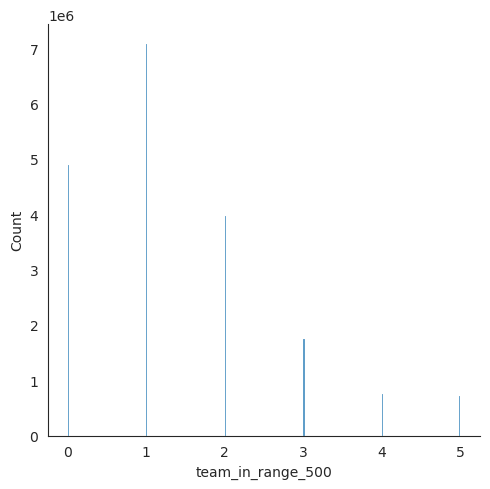

In [7]:
# Distribution plot using Seaborn
import seaborn as sns

# Set the style for Seaborn plots
sns.set_style("white")

# Create the distribution plot
dp = sns.displot(matches_df.team_in_range_500)

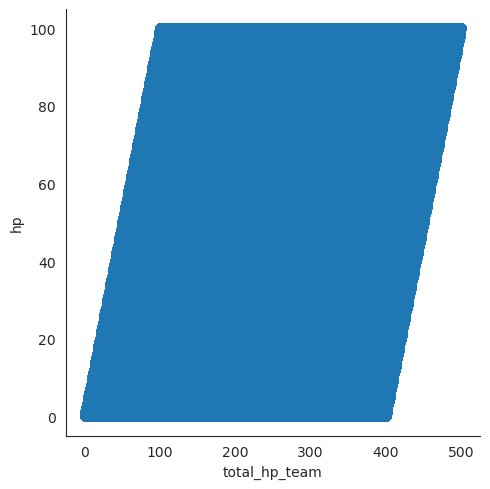

In [9]:
# Relationship plot using Seaborn
import seaborn as sns

# Set the style for Seaborn plots
sns.set_style("white")

# Create the relationship plot (Takes about 12 minutes!)
lp = sns.lmplot(x='total_hp_team', y='hp', data=matches_df)


                             hp     armor  equipmentValue  kills_from_avg  \
hp                     1.000000  0.798398        0.645795        0.012366   
armor                  0.798398  1.000000        0.773312        0.033711   
equipmentValue         0.645795  0.773312        1.000000        0.079012   
kills_from_avg         0.012366  0.033711        0.079012        1.000000   
deaths_from_avg       -0.184099 -0.184898       -0.235423       -0.382631   
total_hp_enemy         0.483700  0.331196        0.220127       -0.031519   
total_hp_team          0.720028  0.575185        0.457492        0.031440   
num_enemy_alive        0.431138  0.288044        0.187267       -0.038688   
num_team_alive         0.691866  0.591996        0.476154        0.038604   
enemy_in_range_2000    0.553909  0.481701        0.371114        0.005259   
team_in_range_500      0.619111  0.518310        0.385083        0.017808   
equipment_value_team   0.475818  0.596903        0.734463        0.073200   

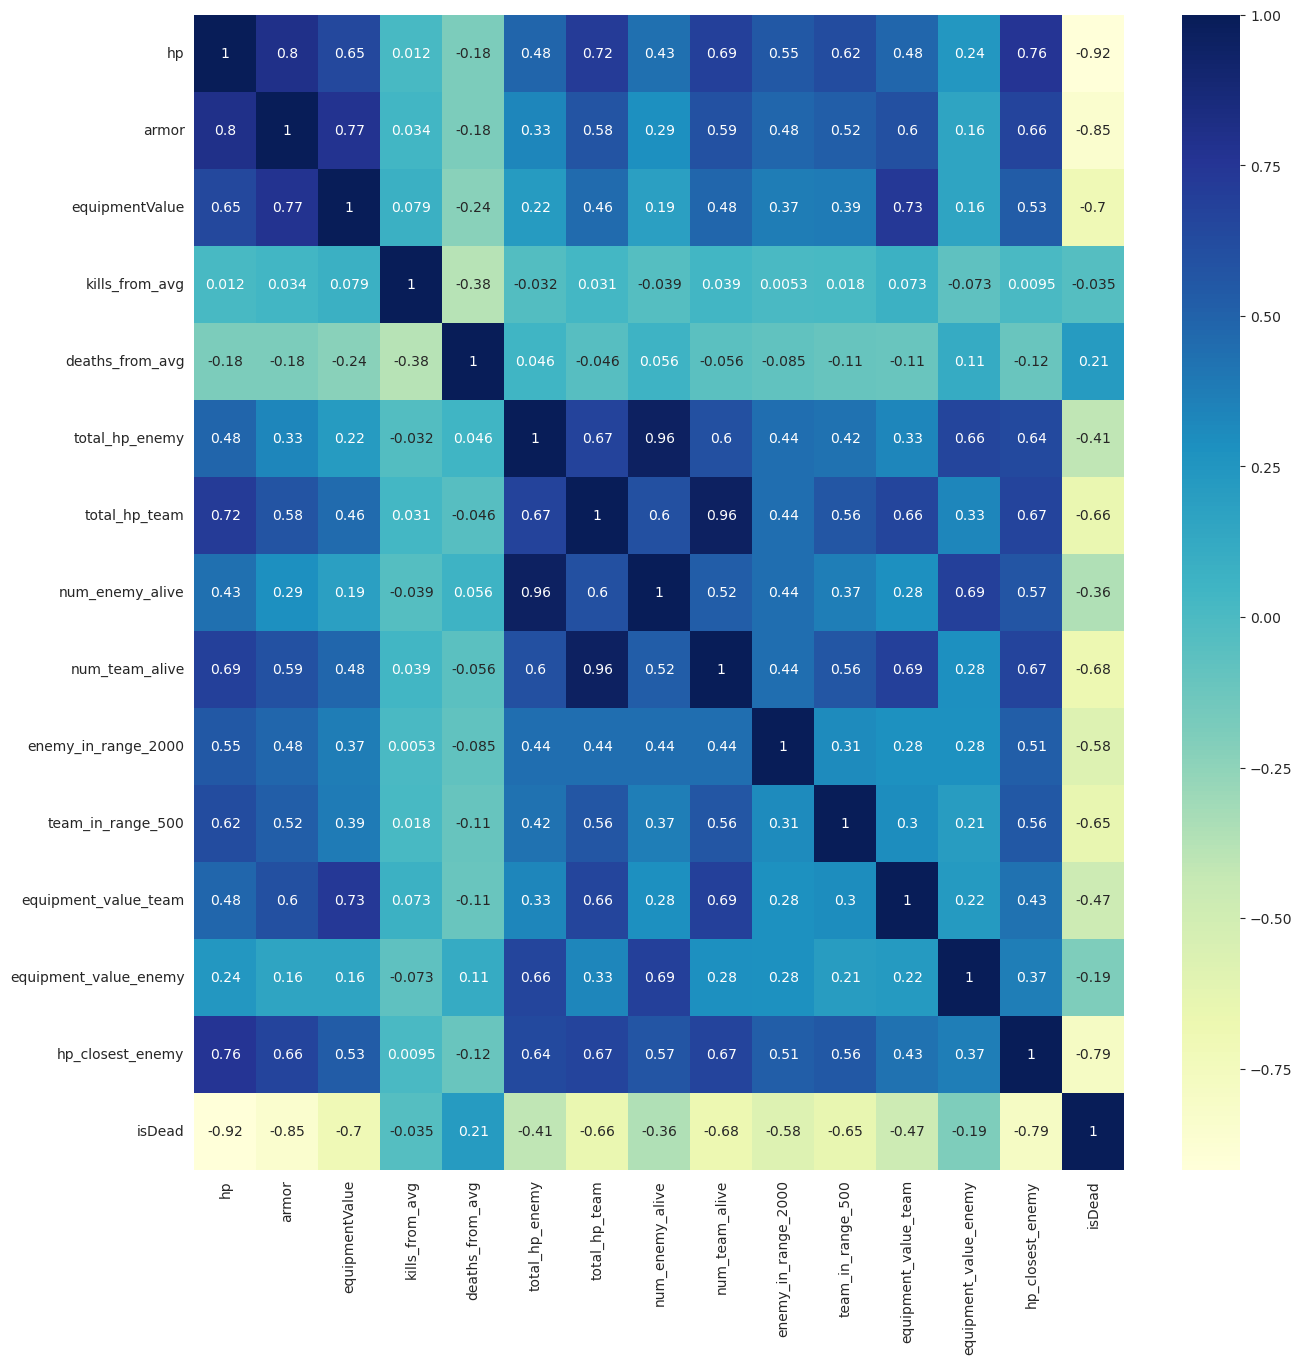

In [8]:
# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,15))

numeric_columns = [ "hp", "armor", "equipmentValue", "kills_from_avg", "deaths_from_avg", "total_hp_enemy", "total_hp_team", 
                   "num_enemy_alive", "num_team_alive", "enemy_in_range_2000", "team_in_range_500", 
                   "equipment_value_team", "equipment_value_enemy", "hp_closest_enemy", "isDead"]

# Select a subset of the columns
df = matches_df[ numeric_columns ]

# Print the correlation matrix
print(df.corr())

# Plot the correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
